In [ ]:
import pandas as pd
import numpy as np
import os
import io

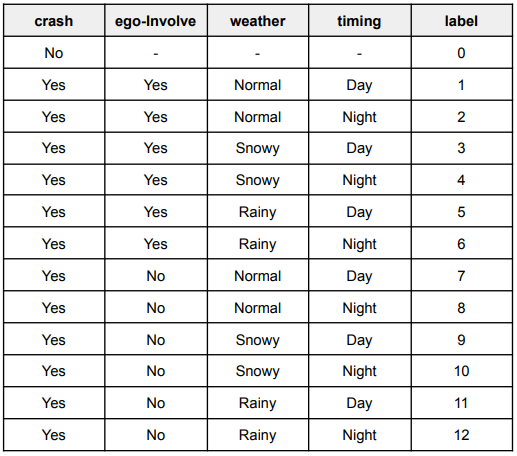

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### timing 데이터 확인
- TEST_0009 가로등 많지만 밤으로 잘 예측
- TEST_0013 낮인지 밤인지 애매(모델은 밤으로 예측)

매우 잘 분류

In [ ]:
# crash+ego 같이
def merge_submision(df1, df2, df3):
    df1.rename(columns={'label': 'crash_ego'}, inplace=True)
    df2.rename(columns={'label': 'weather'}, inplace=True)
    df3.rename(columns={'label': 'timing'}, inplace=True)

    merged_df = df1.merge(df2, on='sample_id') \
                   .merge(df3, on='sample_id') \

    def determine_label(row):
        if row['crash_ego'] == 0:
            return 0
        conditions = [
            ([1, 0, 0], 1),
            ([1, 0, 1], 2),
            ([1, 1, 0], 3),
            ([1, 1, 1], 4),
            ([1, 2, 0], 5),
            ([1, 2, 1], 6),
            ([2, 0, 0], 7),
            ([2, 0, 1], 8),
            ([2, 1, 0], 9),
            ([2, 1, 1], 10),
            ([2, 2, 0], 11),
            ([2, 2, 1], 12),
        ]
        for condition, label in conditions:
            if [row['crash_ego'], row['weather'], row['timing']] == condition:
                return label
        return np.nan  # 기본값

    merged_df['label'] = merged_df.apply(determine_label, axis=1)

    return merged_df

In [ ]:
def merge_submision(df1, df2, df3, df4):
    df1.rename(columns={'label': 'crash'}, inplace=True)
    df2.rename(columns={'label': 'ego_Involve'}, inplace=True)
    df3.rename(columns={'label': 'weather'}, inplace=True)
    df4.rename(columns={'label': 'timing'}, inplace=True)

    merged_df = df1.merge(df2, on='sample_id') \
                   .merge(df3, on='sample_id') \
                   .merge(df4, on='sample_id')

    def determine_label(row):
        if row['crash'] == 0:
            return 0
        conditions = [
            ([1, 0, 0, 0], 1),
            ([1, 0, 0, 1], 2),
            ([1, 0, 1, 0], 3),
            ([1, 0, 1, 1], 4),
            ([1, 0, 2, 0], 5),
            ([1, 0, 2, 1], 6),
            ([1, 1, 0, 0], 7),
            ([1, 1, 0, 1], 8),
            ([1, 1, 1, 0], 9),
            ([1, 1, 1, 1], 10),
            ([1, 1, 2, 0], 11),
            ([1, 1, 2, 1], 12),
        ]
        for condition, label in conditions:
            if [row['crash'], row['ego_Involve'], row['weather'], row['timing']] == condition:
                return label
        return np.nan  # 기본값

    merged_df['label'] = merged_df.apply(determine_label, axis=1)

    return merged_df

### 1-5

In [ ]:
# ?, ?
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_r3d_prex_submit_0519.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_submit_0518.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0530.csv', index=False)

In [ ]:
# ?, ?
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0525.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_r3d_submit_0531_2.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_submit_0518.csv')
merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission_0531_2.csv', index=False)

In [ ]:
# # 0.41, 0.38
# crash_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash/crash_r3d_submit_0514.csv')
# ego_Involve_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/ego-Involve/ego-Involve_r3d_submit_0520.csv')
# weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_r3d_prex_submit_0519.csv')
# timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_submit_0518.csv')

# merged_df = merge_submision(crash_csv, ego_Involve_csv, weather_csv, timing_csv)

In [ ]:
# 0.54, 0.55
crash_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash/crash_r3d_submit_0514.csv')
ego_Involve_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/ego-Involve/ego-Involve_r3d_submit_0520.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_swin_submit_0518.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_submit_0518.csv')

merged_df = merge_submision(crash_csv, ego_Involve_csv, weather_csv, timing_csv)

In [ ]:
#
crash_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash/crash_r3d_submit_0514.csv')
ego_Involve_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/ego-Involve/ego-Involve_r3d_submit_0520.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_r3d_submit_0531_2.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_submit_0518.csv')

merged_df = merge_submision(crash_csv, ego_Involve_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0531_2.csv', index=False)

### 6-10

In [ ]:
#  0.57, 0.57
crash_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash/crash_r3d_submit_0514.csv')
ego_Involve_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/ego-Involve/ego-Involve_r3d_submit_0520.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_r3d_submit_0531_1.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_submit_0518.csv')

merged_df = merge_submision(crash_csv, ego_Involve_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0531_1.csv', index=False)

In [ ]:
# 0.48, 0.59
crash_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash/crash_r3d_submit_0514.csv')
ego_Involve_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/ego-Involve/ego-Involve_r3d_submit_0520.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_r3d_submit_0601_1.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_submit_0518.csv')

merged_df = merge_submision(crash_csv, ego_Involve_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0602_1.csv', index=False)

In [ ]:
#
crash_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash/crash_r3d_submit_0514.csv')
ego_Involve_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/ego-Involve/ego-Involve_r3d_submit_0520.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_r3d_submit_0602_1.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_submit_0518.csv')

merged_df = merge_submision(crash_csv, ego_Involve_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0602_2.csv', index=False)

In [ ]:
#
crash_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash/crash_r3d_submit_0514.csv')
ego_Involve_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/ego-Involve/ego-Involve_r3d_submit_0520.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_r3d_submit_0602_1.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_csv, ego_Involve_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0603_1.csv', index=False)

In [ ]:
# 0.56, 0.62
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_r3d_submit_0602_1.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0603_2.csv', index=False)

### 11-15

In [ ]:
# 0.56, 0.62
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/weather_to_image_infer.csv.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0607_1.csv', index=False)

In [ ]:
# 0.66, 0.62
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/weather_resnet50_submit_대현_0608_1.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0608_1.csv', index=False)

In [ ]:
# 0.63, 0.70
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/weather_resnet18_submit_0612_대현.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0612_1.csv', index=False)

In [ ]:
# 0.63, 0.70
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0612_1.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/weather_resnet18_submit_0612_대현.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0612_2.csv', index=False)

In [ ]:
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0612_1.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_r3d_submit_0602_1.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0619_1.csv', index=False)

### 안익균 실험 중

In [ ]:
# crash+ego 같이
def merge_submision(df1, df2, df3):
    df1.rename(columns={'label': 'crash_ego'}, inplace=True)
    df2.rename(columns={'label': 'weather'}, inplace=True)
    df3.rename(columns={'label': 'timing'}, inplace=True)

    merged_df = df1.merge(df2, on='sample_id') \
                   .merge(df3, on='sample_id') \

    def determine_label(row):
        if row['crash_ego'] == 0:
            return 0
        conditions = [
            ([1, 0, 0], 1),
            ([1, 0, 1], 2),
            ([1, 1, 0], 3),
            ([1, 1, 1], 4),
            ([1, 2, 0], 5),
            ([1, 2, 1], 6),
            ([2, 0, 0], 7),
            ([2, 0, 1], 8),
            ([2, 1, 0], 9),
            ([2, 1, 1], 10),
            ([2, 2, 0], 11),
            ([2, 2, 1], 12),
        ]
        for condition, label in conditions:
            if [row['crash_ego'], row['weather'], row['timing']] == condition:
                return label
        return np.nan  # 기본값

    merged_df['label'] = merged_df.apply(determine_label, axis=1)

    return merged_df

In [ ]:
# 1~5차 실험 resnet 18, 50, 101 submit
import io
import pandas as pd
weather_csv_list = pd.read_csv(io.StringIO('''
weather_resnet18_Del_NoWeight_Nt_NFC_NotFreeze_1frame_H.csv
weather_resnet18_Del_NoWeight_Nt_NFC_NotFreeze_3frame_H.csv
weather_resnet18_Del_NoWeight_Nt_NFC_NotFreeze_5frame_H.csv
weather_resnet18_Del_NoWeight_Yt_NFC_NotFreeze_1frame_H.csv
weather_resnet18_Del_NoWeight_Yt_NFC_NotFreeze_3frame_H.csv
weather_resnet18_Del_NoWeight_Yt_NFC_NotFreeze_5frame_H.csv
weather_resnet18_Del_NoWeight_Yt_FC_NotFreeze_1frame_H.csv
weather_resnet18_Del_NoWeight_Yt_FC_NotFreeze_3frame_H.csv
weather_resnet18_Del_NoWeight_Yt_FC_NotFreeze_5frame_H.csv
weather_resnet18_Del_NoWeight_Yt2_FC_NotFreeze_1frame_H.csv
weather_resnet18_Del_NoWeight_Yt2_FC_NotFreeze_3frame_H.csv
weather_resnet18_Del_NoWeight_Yt2_FC_NotFreeze_5frame_H.csv
weather_resnet18_Del_Weight_Yt_FC_NotFreeze_1frame_H.csv
weather_resnet18_Del_Weight_Yt_FC_NotFreeze_3frame_H.csv
weather_resnet18_Del_Weight_Yt_FC_NotFreeze_5frame_H.csv
weather_resnet50_Del_NoWeight_Nt_NFC_NotFreeze_1frame_H.csv
weather_resnet50_Del_NoWeight_Nt_NFC_NotFreeze_3frame_H.csv
weather_resnet50_Del_NoWeight_Nt_NFC_NotFreeze_5frame_H.csv
weather_resnet50_Del_NoWeight_Yt_NFC_NotFreeze_1frame_H.csv
weather_resnet50_Del_NoWeight_Yt_NFC_NotFreeze_3frame_H.csv
weather_resnet50_Del_NoWeight_Yt_NFC_NotFreeze_5frame_H.csv
weather_resnet50_Del_NoWeight_Yt_FC_NotFreeze_1frame_H.csv
weather_resnet50_Del_NoWeight_Yt_FC_NotFreeze_3frame_H.csv
weather_resnet50_Del_NoWeight_Yt_FC_NotFreeze_5frame_H.csv
weather_resnet50_Del_NoWeight_Yt2_FC_NotFreeze_1frame_H.csv
weather_resnet50_Del_NoWeight_Yt2_FC_NotFreeze_3frame_H.csv
weather_resnet50_Del_NoWeight_Yt2_FC_NotFreeze_5frame_H.csv
weather_resnet50_Del_Weight_Yt_FC_NotFreeze_1frame_H.csv
weather_resnet50_Del_Weight_Yt_FC_NotFreeze_3frame_H.csv
weather_resnet50_Del_Weight_Yt_FC_NotFreeze_5frame_H.csv
weather_resnet101_Del_NoWeight_Nt_NFC_NotFreeze_1frame_H.csv
weather_resnet101_Del_NoWeight_Nt_NFC_NotFreeze_3frame_H.csv
weather_resnet101_Del_NoWeight_Nt_NFC_NotFreeze_5frame_H.csv
weather_resnet101_Del_NoWeight_Yt_NFC_NotFreeze_1frame_H.csv
weather_resnet101_Del_NoWeight_Yt_NFC_NotFreeze_3frame_H.csv
weather_resnet101_Del_NoWeight_Yt_NFC_NotFreeze_5frame_H.csv
weather_resnet101_Del_NoWeight_Yt_FC_NotFreeze_1frame_H.csv
weather_resnet101_Del_NoWeight_Yt_FC_NotFreeze_3frame_H.csv
weather_resnet101_Del_NoWeight_Yt_FC_NotFreeze_5frame_H.csv
weather_resnet101_Del_NoWeight_Yt2_FC_NotFreeze_1frame_H.csv
weather_resnet101_Del_NoWeight_Yt2_FC_NotFreeze_3frame_H.csv
weather_resnet101_Del_NoWeight_Yt2_FC_NotFreeze_5frame_H.csv
weather_resnet101_Del_Weight_Yt_FC_NotFreeze_1frame_H.csv
weather_resnet101_Del_Weight_Yt_FC_NotFreeze_3frame_H.csv
weather_resnet101_Del_Weight_Yt_FC_NotFreeze_5frame_H.csv
'''), header=None)

In [ ]:
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')

timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

# 경로 매핑
path_mapping = {
    "Del_NoWeight_Nt_NFC_NotFreeze": "1Del_NoWeight_Nt_NFC_NotFreeze",
    "Del_NoWeight_Yt_NFC_NotFreeze": "2Del_NoWeight_Yt_NFC_NotFreeze",
    "Del_NoWeight_Yt_FC_NotFreeze": "3Del_NoWeight_Yt_FC_NotFreeze",
    "Del_NoWeight_Yt2_FC_NotFreeze": "4Del_NoWeight_Yt2_FC_NotFreeze",
    "Del_Weight_Yt_FC_NotFreeze": "5Del_Weight_Yt_FC_NotFreeze"
}

# 반복문을 통해 각 weather CSV 파일 처리
for index, row in weather_csv_list.iterrows():
    weather_file = row[0]
    for key in path_mapping:
        if key in weather_file:
            folder = path_mapping[key]
            weather_path = os.path.join('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/', folder, weather_file)
            weather_csv = pd.read_csv(weather_path)
            merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)

            # 최종 제출 파일의 이름 설정
            output_filename = os.path.join('/content/drive/MyDrive/image classification/data_folder/submission/final_submission', weather_file)
            merged_df[['sample_id', 'label']].to_csv(output_filename, index=False)

            print(f'{output_filename} 생성 완료.')
            break

/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_resnet18_Del_NoWeight_Nt_NFC_NotFreeze_1frame_H.csv 생성 완료.
/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_resnet18_Del_NoWeight_Nt_NFC_NotFreeze_3frame_H.csv 생성 완료.
/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_resnet18_Del_NoWeight_Nt_NFC_NotFreeze_5frame_H.csv 생성 완료.
/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_resnet18_Del_NoWeight_Yt_NFC_NotFreeze_1frame_H.csv 생성 완료.
/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_resnet18_Del_NoWeight_Yt_NFC_NotFreeze_3frame_H.csv 생성 완료.
/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_resnet18_Del_NoWeight_Yt_NFC_NotFreeze_5frame_H.csv 생성 완료.
/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_re

In [ ]:
# 하나씩 할 떄 코드
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

# weather
weather_csv = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/2Del_NoWeight_Yt_NFC_NotFreeze/weather_resnet50_Del_NoWeight_Yt_NFC_NotFreeze_1frame_H.csv')


merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0620_2.csv', index=False)

In [ ]:
# 하나씩 할 떄 코드
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')

timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

# weather
weather_csv = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/6Del_Weight_Yt3_NFC_NotFreeze_retry/weather_resnet50_Del_Weight_Yt3_NFC_NotFreeze_1frame_H.csv')


merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0620_1.csv', index=False)

In [ ]:
# 7차 실험 resnet50 전처리에 마스킹 추가함
# 결과
#0.6185054084
#0.723466613

crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')

timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

# weather
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/7Del_Weight_Yt4_NFC_NotFreeze/weather_resnet50_Del_Weight_Yt4_NFC_NotFreeze_3frame_H.csv')


merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_resnet50_Del_Weight_Yt4_NFC_NotFreeze_3frame_H.csv', index=False)

In [ ]:
# 8차 실험 기존 베스트 모델에 새로운 학습데이터 추가
# 결과
#0.6185054084
#0.723466613

crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')

timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

# weather
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/8Del_Weight_Yt3_NFC_NotFreeze_Add/weather_resnet50_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv')


merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_resnet50_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv', index=False)

In [ ]:
# 9차 실험
# swin_base 3frame
#0.6143314296
#0.6249892441
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/9Del_Weight_Yt3_NFC_NotFreeze_Add/weather_swin_base_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_swin_base_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv', index=False)

# effifcientV2_m 3frame
# 미제출
#
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')
#weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/8Del_Weight_Yt3_NFC_NotFreeze_Add/weather_resnet50_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_resnet50_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv', index=False)

# convnext_base 3frame
#0.6616018706
#0.6722629098
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/9Del_Weight_Yt3_NFC_NotFreeze_Add/weather_convnext_base_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_convnext_base_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv', index=False)

In [ ]:
# 10차 실험
# covnext_large
# 0.661
# 0.672
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/10Del_NoWeight_Yt4_NFC_NotFreeze_Add/weather_convnext_large_Del_NoWeight_Yt4_NFC_NotFreeze_Add_3frame_H.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_convnext_large_Del_NoWeight_Yt4_NFC_NotFreeze_Add_3frame_H.csv', index=False)



In [ ]:
# 11차 실험결과
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')


# swin_base 0.725 / 0.607ResNet 3D-18
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/11Del_Weight_Yt4_NFC_NotFreeze/weather_swin_base_Del_Weight_Yt4_NFC_NotFreeze_3frame_H.csv')
merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_swin_base_Del_Weight_Yt4_NFC_NotFreeze_3frame_H.csv', index=False)

# efficientnetv2_rw_m 0.673 / 0.548
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/11Del_Weight_Yt4_NFC_NotFreeze/weather_efficientnetv2_rw_m _Del_Weight_Yt4_NFC_NotFreeze_3frame_H.csv')
merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_efficientnetv2_rw_m _Del_Weight_Yt4_NFC_NotFreeze_3frame_H.csv', index=False)

# convnext_large 0.605 / 0.548
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/11Del_Weight_Yt4_NFC_NotFreeze/weather_convnext_large_Del_Weight_Yt4_NFC_NotFreeze_3frame_H.csv')
merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_convnext_large_Del_Weight_Yt4_NFC_NotFreeze_3frame_H.csv', index=False)

In [ ]:
# 12차 실험결과
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')


# swin_base 1e5
# 0.6375048687
# 0.5942510331
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/12Del_Weight_Yt4_NFC_NotFreeze_ADD2/weather_swin_base_1e5_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv')
merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_swin_base_1e5_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv', index=False)

# swin_base 1e6
# 0.6870314656
# 0.6850336755
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/12Del_Weight_Yt4_NFC_NotFreeze_ADD2/weather_swin_base_1e6_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv')
merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_swin_base_1e6_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv', index=False)

# swin_base 2e6
# 0.6694946332
# 0.6309811277
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/12Del_Weight_Yt4_NFC_NotFreeze_ADD2/weather_swin_base_2e6_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv')
merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_swin_base_2e6_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv', index=False)

In [ ]:
# 13차 실험결과
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

# 12보다 눈비에 대한 가중치를 약간 줄임
# swin_base 1e5
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/13Del_Weight_Yt4_NFC_NotFreeze_ADD2/weather_swin_base_1e5_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv')
merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_swin_base_1e5_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv', index=False)

# swin_base 1e6
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/13Del_Weight_Yt4_NFC_NotFreeze_ADD2/weather_swin_base_1e6_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv')
merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_swin_base_1e6_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv', index=False)

# swin_base 5e6
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/13Del_Weight_Yt4_NFC_NotFreeze_ADD2/weather_swin_base_5e6_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv')
merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_swin_base_5e6_Del_Weight_Yt4_NFC_NotFreeze_ADD2_3frame_H.csv', index=False)

In [ ]:
# 2차 Resnet
# covnext_large
#
#
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/my_data/CarCrash_image/model_checkpoint/2Del_NoWeight_Yt_NFC_NotFreeze/weather_resnet50_Del_NoWeight_Yt_NFC_NotFreeze_3frame_H.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/weather_resnet50_Del_NoWeight_Yt_NFC_NotFreeze_3frame_H.csv', index=False)

### Best score

In [ ]:
# 0.70, 0.66
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/weather_resnet18_submit_0613_1_대현.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0613_1.csv', index=False)

In [ ]:
#
crash_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash/crash_r3d_submit_0514.csv')
ego_Involve_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/ego-Involve/ego-Involve_swin_submit_0614.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/weather_resnet18_submit_0612_대현.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_csv, ego_Involve_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0614_2.csv', index=False)

In [ ]:
# 0.63, 0.70
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/weather_resnet18_submit_0612_대현.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0612_1.csv', index=False)

### Best score 가중치 불러서 예측

In [ ]:
# 모델 정의
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(512, 3)

# 저장된 가중치 불러오기
model.load_state_dict(torch.load('/content/drive/MyDrive/CarCrash_image/model_checkpoint/best_weather_model_0608_대현_1.pth'))

In [ ]:
transform_test = transforms.Compose([
    transforms.Resize((CFG['IMG_SIZE'], CFG['IMG_SIZE'])),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
class Video_to_image_Dataset(Dataset):
    def __init__(self, video_path_list, transform=None, label_list=None, frame_number):
        self.video_path_list = video_path_list
        self.label_list = label_list
        self.transform = transform

    def __getitem__(self, index, frame_number):
        frame = self.get_frame(self.video_path_list[index], frame_number)  # 원하는 프레임 번호로 수정
        if self.transform:
            frame = self.transform(frame)

        if self.label_list is not None:
            label = self.label_list[index]
            return frame, label
        else:
            return frame
    def __len__(self):
        return len(self.video_path_list)

    def get_frame(self, path, frame_number):
        cap = cv2.VideoCapture(path)
        frame_count = CFG['VIDEO_LENGTH']

        # 프레임 번호 설정
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

        ret, frame = cap.read()
        cap.release()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # RGB로 변환
        return Image.fromarray(frame)

In [ ]:
test = pd.read_csv('/content/data1/test.csv')

test['video_path'] = test['video_path'].str.replace('./test', '/content/data1/test')

test_dataset = Video_to_image_Dataset(test['video_path'].values,transform = transform_test, frame_number=0)
test_loader = DataLoader(test_dataset, batch_size = 1, shuffle=False, num_workers=0)
preds1 = inference(infer_model, test_loader, device)

test_dataset = Video_to_image_Dataset(test['video_path'].values,transform = transform_test, frame_number=24)
test_loader = DataLoader(test_dataset, batch_size = 1, shuffle=False, num_workers=0)
preds2 = inference(infer_model, test_loader, device)

test_dataset = Video_to_image_Dataset(test['video_path'].values,transform = transform_test, frame_number=49)
test_loader = DataLoader(test_dataset, batch_size = 1, shuffle=False, num_workers=0)
preds3 = inference(infer_model, test_loader, device)

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

In [ ]:
df_preds1 = pd.DataFrame(preds1, columns=['label'])
df_preds2 = pd.DataFrame(preds2, columns=['label'])
df_preds3 = pd.DataFrame(preds3, columns=['label'])

print(df_preds1['label'].value_counts())
print(df_preds2['label'].value_counts())
print(df_preds3['label'].value_counts())

In [ ]:
final_preds = []
for i in range(len(preds1)):
    vote = np.argmax(np.bincount([preds1[i], preds2[i], preds3[i]]))
    final_preds.append(vote)

submit = pd.read_csv('/content/data1/sample_submission.csv')
submit['label'] = final_preds
save_submit_path = '???????????????????????'
submit.to_csv(save_submit_path, index=False)

### weather 다 Normal로 두고 예측

In [ ]:
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/weather_to_image_infer.csv.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

In [ ]:
# 비 x
weather_csv['label'].value_counts()

label
0    1221
1     579
Name: count, dtype: int64

In [ ]:
weather_csv['label'] = 0
weather_csv['label'].value_counts()

label
0    1800
Name: count, dtype: int64

In [ ]:
merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0607_1.csv', index=False)

In [ ]:
merged_df['label'].value_counts()

label
0    1221
7     261
1     257
2      40
8      21
Name: count, dtype: int64

### hard voting

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/weather/weather_r3d_submit_0602_1.csv') # r3d
df2 = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/weather_resnet18_submit_0613_1_대현.csv')  # vit
df3 = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/2Del_NoWeight_Yt_NFC_NotFreeze/weather_resnet50_Del_NoWeight_Yt_NFC_NotFreeze_3frame_H.csv')  # resnet50
df4 = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/9Del_Weight_Yt3_NFC_NotFreeze_Add/weather_swin_base_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv')  # swin
df5 = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/9Del_Weight_Yt3_NFC_NotFreeze_Add/weather_convnext_base_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv')  # convnext

In [ ]:
df1['label'][0]

0

In [ ]:
[df1['label'][i], df2['label'][i], df3['label'][i], df4['label'][i], df5['label'][i]]

[0, 0, 0, 0, 0]

In [ ]:
final_preds = []
for i in range(len(df1['label'])):
    vote = np.argmax(np.bincount([df1['label'][i], df2['label'][i], df3['label'][i], df4['label'][i], df5['label'][i]]))
    final_preds.append(vote)

In [ ]:
len(final_preds)

1800

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/weather_resnet18_submit_0613_1_대현.csv')  # vit
df4 = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/9Del_Weight_Yt3_NFC_NotFreeze_Add/weather_swin_base_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv')  # swin
df5 = pd.read_csv('/content/drive/MyDrive/CarCrash_image/model_checkpoint/9Del_Weight_Yt3_NFC_NotFreeze_Add/weather_convnext_base_Del_Weight_Yt3_NFC_NotFreeze_Add_3frame_H.csv')  # convnext

In [ ]:
final_preds = []
for i in range(len(df1['label'])):
    vote = np.argmax(np.bincount([df2['label'][i], df4['label'][i], df5['label'][i]]))
    final_preds.append(vote)

### 최종 예측

In [ ]:
weather_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
weather_csv['label'] = final_preds
weather_csv['label'].value_counts()

label
0    1051
2     495
1     254
Name: count, dtype: int64

In [ ]:
# 60, 66 hard voting(weather) # 3개 hv
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0615_2.csv', index=False)

In [ ]:
# 60, 66 hard voting(weather) 5개 hv
crash_ego_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/crash+ego/crash+ego_r3d_submit_0530.csv')
timing_csv = pd.read_csv('/content/drive/MyDrive/image classification/data_folder/submission/timing/timing_r3d_kfold_0603_1.csv')

merged_df = merge_submision(crash_ego_csv, weather_csv, timing_csv)
merged_df[['sample_id', 'label']].to_csv('/content/drive/MyDrive/image classification/data_folder/submission/final_submission/final_submission_0615_1.csv', index=False)

In [ ]:
# ResNet 3D-18
df1['label'].value_counts()

label
0    1518
1     188
2      94
Name: count, dtype: int64

In [ ]:
# VIT
df2['label'].value_counts()

label
0    807
2    658
1    335
Name: count, dtype: int64

In [ ]:
# ResNet50
df3['label'].value_counts()

label
0    1486
1     185
2     129
Name: count, dtype: int64

In [ ]:
# Swin
df4['label'].value_counts()

label
0    1186
2     390
1     224
Name: count, dtype: int64

In [ ]:
# ConvNeXt
df5['label'].value_counts()

label
0    1036
2     507
1     257
Name: count, dtype: int64